In [239]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV,train_test_split
sns.set_style("darkgrid")
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from scipy.stats import norm
from matplotlib.colors import ListedColormap
import IPython
from IPython.display import display, HTML
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [218]:
df_final = pd.read_table("../../../data/updated_dataset/refined_components_updated.tsv",sep="\t",low_memory=False)
df_initial = pd.read_csv("../../../data/initial_dataset/Master_04_10_2019.csv",sep = ',' ,low_memory=False)
df_initial = df_initial[["data_pd","age"]].set_index("data_pd")
df_initial.index.name=None
df = df_final.merge(df_initial,left_index=True,right_index=True)

In [152]:
a = df.corr()["age"].abs().sort_values(ascending=False)>0.1
l = list(a[a].index.values)
l.remove("initial_predicted_component")
l.remove("second_predicted_component")
df.corr()["age"].abs().sort_values(ascending=False)[l]
data =df[l]
data.dropna(inplace=True)

/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


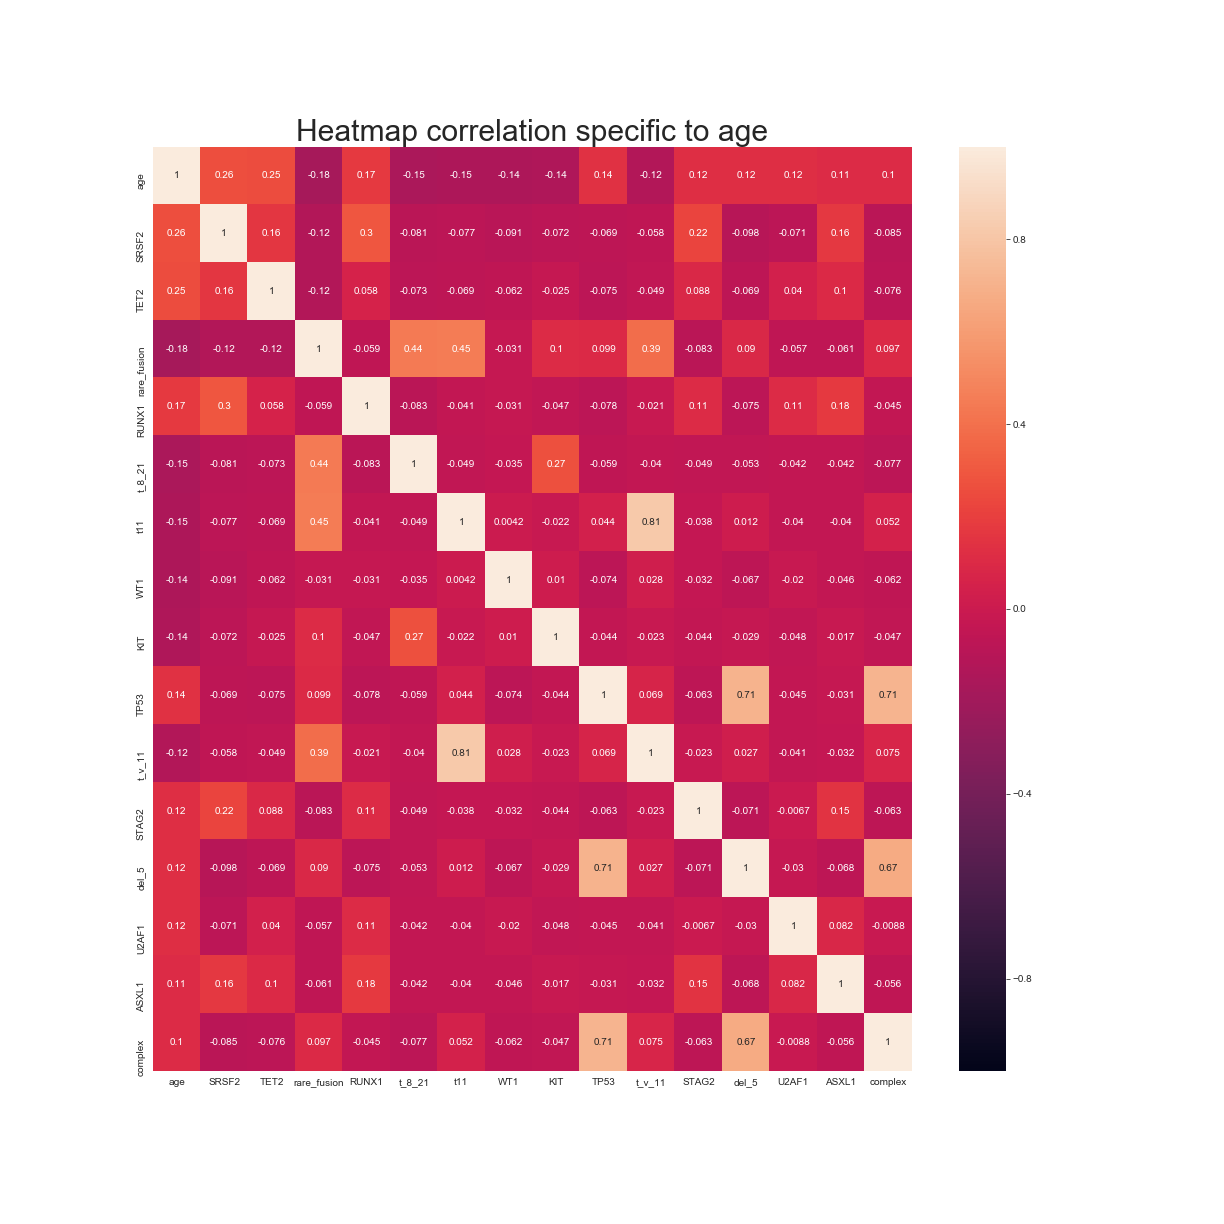

In [153]:
plt.figure(figsize=(17,17))
plt.title("Heatmap correlation specific to age",fontsize=30)
sns.heatmap(data.corr(),annot=True,vmin=-1)

In [228]:
data = df._get_numeric_data()

In [229]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
Xs = data.drop("age",axis=1)
y = data["age"]
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, Xs, y, cv=5)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

-7.152763447372813e+18


In [194]:
ridge= Ridge()
parameters = {'alpha':np.arange(4,6,0.1)}
ridge_regressor = GridSearchCV(ridge,parameters,cv = 5)
ridge_regressor.fit(Xs,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 4.9999999999999964}
-0.16137856628656447


In [200]:
lasso= Lasso()
parameters = {'alpha':[1e-12,1e-11,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,cv = 5)
lasso_regressor.fit(Xs,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-12}
-0.16190775188786627


In [230]:
def everything(data, param_grid,func, test_size=0.15, cv=3):
 
    clf = GridSearchCV(func, param_grid, cv=cv)
    X_train, X_test, y_train, y_test = train_test_split(data.drop("age",axis=1), 
                                                    data.age, test_size=test_size, random_state=42, shuffle=True)
    mean = y_train.mean()
    std = y_train.std()
    y_train = ((y_train-mean)/std)
    y_test = ((y_test-mean)/std)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    O1 = mean_squared_error(y_test, y_pred)
    O2 = clf.score(X_test,y_test)
    O3 = clf.score(X_train,y_train)
    print('Best parameters:', clf.best_params_)
    print
    print('Mean squared error on testing:', O1)
    print
    print('R squared on testing:', O2)
    print
    print('R squared on training:', O3)
    return(O1,O2,O3)

In [231]:
everything(data, param_grid=[{'fit_intercept': [True]}],func=linear_model.LinearRegression(), test_size=0.15, cv=3)

Best parameters: {'fit_intercept': True}
Mean squared error on testing: 1.0395839047389625e+20
R squared on testing: -1.137932471106926e+20
R squared on training: 0.3232000883432027


(1.0395839047389625e+20, -1.137932471106926e+20, 0.3232000883432027)

In [232]:
param_grid = [{'alpha': [0.0000001, 0.0000001,0.1,1]}]
LA1 = everything(data, param_grid=param_grid,
           func=Lasso(), test_size=0.15, cv=3)

/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

Best parameters: {'alpha': 1e-07}
Mean squared error on testing: 0.7515008117579797
R squared on testing: 0.17740437124471753
R squared on training: 0.323200162242521


/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [233]:
param_grid = [{'alpha': np.linspace(0.0001, 0.1, 100)}]
RG1 = everything(data, param_grid=param_grid,
           func=Ridge(), test_size=0.15, cv=3)

Best parameters: {'alpha': 0.1}
Mean squared error on testing: 0.7426750173156874
R squared on testing: 0.18706511919725644
R squared on training: 0.3230868636104402


In [234]:
param_grid = [{'alpha': np.linspace(0.00001,1,10),
               'l1_ratio': np.linspace(0.01,0.99,10)}]
EN1 = everything(data, param_grid=param_grid,
           func=ElasticNet(), test_size=0.15, cv=3)

/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/taziy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

Best parameters: {'alpha': 0.11112, 'l1_ratio': 0.01}
Mean squared error on testing: 0.7553866097736299
R squared on testing: 0.17315096205089053
R squared on training: 0.21437179265231632


In [235]:
param_grid = [{'n_estimators':[i for i in range (100,1000,100)],
               'max_depth':[i for i in range(1,6)],
                'min_samples_split':[2,3]}]
RF1 = everything(data, param_grid=param_grid,
           func=RandomForestRegressor(random_state=42,), test_size=0.15, cv=3)


Best parameters: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}
Mean squared error on testing: 0.7577818023657461
R squared on testing: 0.170529175187224
R squared on training: 0.3157143658027094


In [236]:
param_grid = [{'n_neighbors':[i for i in range (2,30)],
               'weights':['uniform','distance']}]
knn1 = everything(data, param_grid=param_grid,
           func=KNeighborsRegressor(), test_size=0.15, cv=3)

Best parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Mean squared error on testing: 0.784720942364665
R squared on testing: 0.14104149073123695
R squared on training: 0.2814465575698887
